In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
install.packages("Synth")
install.packages("tidysynth")
install.packages("tictoc")
install.packages("here")
install.packages("openxlsx")

library(dplyr)
library(tidysynth)
library(Synth)
library(tictoc)

library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘nloptr’, ‘pracma’, ‘kernlab’, ‘optimx’, ‘rgenoud’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


##
## Synth Package: Implements Synthetic Control Methods.


## See https://web.stanford.edu/~jhain/synthpage.html for additional information.





In [ ]:
# df_master <- read.csv("/content/drive/MyDrive/Colab Notebooks/Railway_Project/data/master_2.csv", fileEncoding = "cp932")
df_master <- read.csv("/content/drive/MyDrive/Colab Notebooks/Railway_Project/data/master_2.csv", fileEncoding = "cp932")
# df_master <- openxlsx::read.("/content/drive/MyDrive/Colab Notebooks/Railway_Project/data/master_2.csv")
# df_control <- openxlsx::read.xlsx("/content/drive/MyDrive/Colab Notebooks/Railway_Project/data/df_control_city.xlsx")

# list_control <- df_control |>
#   dplyr::distinct(city_id) |>
#   dplyr::pull()

# list_omitted <- c(1233, 4505, 7213, 11381, 12421, 43348)

# df_master <- df_master |>
#   dplyr::filter(
#     treatment == 1 | city_id %in% list_control
#   )

df_master <- df_master |>
  dplyr::filter(
    # !city_id %in% list_omitted,
    year >= 1996 & year <= 2019
  ) |>
    dplyr::group_by(city_id) |>
    dplyr::mutate(
    cum_social = cumsum(replace_na(social_rate, 0))
    )

head(df_master)



df_master |>
  dplyr::filter(
  treatment == 1
  ) |>
    distinct(city_id)

nrow(df_master)

df_master |>
  dplyr::group_by(city_id) |>
    dplyr::mutate(
      cum_social = cumsum(replace_na(social_rate, 0))
      ) |>
  dplyr::filter(city_id == "1549") |>
  dplyr::select(year, cum_social)

df_master |>
  distinct(city_name) |>
  nrow()



city_id,cut_off,city_name,year,year_end,male,female,total,lag_total,household,⋯,pop_rent,workforce_pop,workforce_rate,working_pop,student_pop,student_rate,old_house_household,old_house_pop,old_house_rate,cum_social
<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1549,0,常呂郡訓子府町,1996,2006,3308,3488,6796,NA,2058,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.000000
1549,0,常呂郡訓子府町,1997,2006,3245,3416,6661,6796,2050,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.824603
1549,0,常呂郡訓子府町,1998,2006,3212,3373,6585,6661,2053,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,-2.860483
1549,0,常呂郡訓子府町,1999,2006,3212,3377,6589,6585,2087,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,-2.890855
1549,0,常呂郡訓子府町,2000,2006,3150,3348,6498,6589,2099,⋯,735,3585,0.5517082,3511,319,0.04909203,813,2318,0.3873273,-3.938055
1549,0,常呂郡訓子府町,2001,2006,3138,3348,6486,6498,2132,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,-4.168895


city_id
<int>
1549
1550
1646
1647
1648
2206
2405
17204
21421


[1] 4728

Adding missing grouping variables: `city_id`


city_id,year,cum_social
<int>,<int>,<dbl>
1549,1996,0.000000
1549,1997,-1.824603
1549,1998,-2.860483
1549,1999,-2.890855
1549,2000,-3.938055
1549,2001,-4.168895
1549,2002,-4.816444
1549,2003,-6.045251
1549,2004,-6.912212


In [ ]:
colnames(df_master)

[1] "city_id"                      "cut_off"                     
 [3] "city_name"                    "year"                        
 [5] "year_end"                     "male"                        
 [7] "female"                       "total"                       
 [9] "lag_total"                    "household"                   
[11] "moving_in"                    "birth"                       
[13] "other_in"                     "increase_total"              
[15] "moving_out"                   "mortality"                   
[17] "other_out"                    "change"                      
[19] "change_rate"                  "natural"                     
[21] "natural_rate"                 "social"                      
[23] "social_rate"                  "treatment"                   
[25] "line_name"                    "victims"                     
[27] "destroyed_all"                "destroyed_half"              
[29] "prefecture_name"              "children_household"          
[31] "household_with_children_rate" "children_pop"                
[33] "household_own"                "own_household_rate"          
[35] "household_rent"               "pop_own"                     
[37] "pop_rent"                     "workforce_pop"               
[39] "workforce_rate"               "working_pop"                 
[41] "student_pop"                  "student_rate"                
[43] "old_house_household"          "old_house_pop"               
[45] "old_house_rate"               "cum_social"

In [ ]:
list_treatment_id <- df_master |>
  dplyr::filter(
    treatment == 1
    ) |>
    dplyr::distinct(
       city_id
      )|>
        dplyr::pull()

# list_treatment_id = list_treatment_id[1:4]

list_treatment_id

[1]  1549  1550  1646  1647  1648  2206  2405 17204 21421 21505 34368 42214
[13] 45441 45442

In [ ]:
for (id_n in list_treatment_id) {


  tictoc::tic()

  synth_data <- df_master

  treatment_one <- synth_data |>
    dplyr::filter(city_id == id_n)

  year_end_n <- unique(treatment_one$year_end)

  print(id_n)

  ss <- synth_data |>
    dplyr::ungroup() |>
    dplyr::filter(treatment == 0 | city_id == id_n) |>
    distinct()
  # dplyr::filter(!city_id  %in% c(7367, 39303, 39304, 40231, 4216))


  df_nan_check <- ss |>
    dplyr::filter(
      year >= 1996 & year <= year_end_n
    ) |>
    dplyr::summarise(
      children = mean(household_with_children_rate, na.rm = TRUE),
      own = mean(own_household_rate, na.rm = TRUE),
      workforce = mean(workforce_rate, na.rm = TRUE),
      student = mean(student_rate, na.rm = TRUE),
      old_house = mean(old_house_rate, na.rm = TRUE),
      population = mean(cum_social, na.rm = TRUE),
      .by = city_id
    )

  list_in <- df_nan_check |>
    tidyr::drop_na() |>
    dplyr::distinct(city_id) |>
    dplyr::pull()

  ss <- ss |>
    dplyr::filter(city_id %in% list_in) |>
    dplyr::select(
      -c(destroyed_all, destroyed_half)
    ) |>
    distinct() |>
    dplyr::group_by(city_id) |>
    # dplyr::mutate(
    #   cum_social = cumsum(replace_na(social_rate, 0))
    # ) |>
    dplyr::mutate(rep_outcome = cum_social) |>
    dplyr::ungroup()

    output_synth <- ss |>

      synthetic_control(
        outcome = cum_social,
        unit = city_id,
        time = year,
        i_unit = id_n,
        i_time = year_end_n,
        generate_placebos = T
      ) |>

      generate_predictor(
        time_window = 1996:year_end_n,
        children = mean(household_with_children_rate, na.rm = TRUE),
        own = mean(own_household_rate, na.rm = TRUE),
        workforce = mean(workforce_rate, na.rm = TRUE),
        student = mean(student_rate, na.rm = TRUE),
        old_house = mean(old_house_rate, na.rm = TRUE),
        population = mean(rep_outcome, na.rm = TRUE)
      ) |>

      # population = mean(rep_outcome, na.rm = TRUE)) |>
      # generate_predictor(time_window = year_end_n + 1,
      #                    pre_year_outcome = rep_outcome) |>

      generate_weights(
        optimization_window = 1996:year_end_n,
        margin_ipop = .02, sigf_ipop = 7, bound_ipop = 6
      ) |>
      generate_control()

  print(id_n)

  city_name_t <- ss |>
    dplyr::filter(
      treatment == 1
    ) |>
    dplyr::distinct(city_name) |>
    dplyr::pull()

  table_name <- paste0(city_name_t,'.rds')

  file_name_table <- paste0(here::here('/content/drive/MyDrive/Colab Notebooks/Railway_Project/all_municipalities',
                                       table_name))


  saveRDS(object =  output_synth,
          file = file_name_table)

  tictoc::toc()

}

[1] 1549
[1] 1549
127.946 sec elapsed
[1] 1550
[1] 1550
79.696 sec elapsed
[1] 1646
[1] 1646
109.994 sec elapsed
[1] 1647
[1] 1647
102.342 sec elapsed
[1] 1648
[1] 1648
97.957 sec elapsed
[1] 2206
[1] 2206
110.445 sec elapsed
[1] 2405
[1] 2405
111.737 sec elapsed
[1] 17204
[1] 17204
109.53 sec elapsed
[1] 21421
[1] 21421
120.688 sec elapsed
[1] 21505
[1] 21505
102.933 sec elapsed
[1] 34368
[1] 34368
138.64 sec elapsed
[1] 42214
[1] 42214
107.404 sec elapsed
[1] 45441
[1] 45441
107.386 sec elapsed
[1] 45442
[1] 45442
128.619 sec elapsed


In [ ]:
list_treatment_id <- df_master |>
  dplyr::filter(
    year_end >= 2003,
    treatment == 1
    ) |>
    dplyr::distinct(
       city_id
      )|>
        dplyr::pull()

# list_treatment_id = list_treatment_id[1:4]

list_treatment_id

[1]  1549  1550  1646  1647  1648  2206  2405 21421 34368 42214 45441 45442

In [ ]:
# id_n = 1549

#   synth_data <- df_master |>
#     dplyr::filter(
#       year_end >= 2003 | treatment == 0
#     )

#   treatment_one <- synth_data |>
#     dplyr::filter(city_id == id_n)

#   year_end_n <- unique(treatment_one$year_end)

#   print(id_n)

#   ss <- synth_data |>
#     dplyr::ungroup() |>
#     dplyr::filter(treatment == 0 | city_id == id_n) |>
#     distinct()
#   # dplyr::filter(!city_id  %in% c(7367, 39303, 39304, 40231, 4216))


#   df_nan_check <- ss |>
#     dplyr::filter(
#       year >= 1996 & year <= year_end_n - 3
#     ) |>
#     dplyr::summarise(
#       children = mean(household_with_children_rate, na.rm = TRUE),
#       own = mean(own_household_rate, na.rm = TRUE),
#       workforce = mean(workforce_rate, na.rm = TRUE),
#       student = mean(student_rate, na.rm = TRUE),
#       old_house = mean(old_house_rate, na.rm = TRUE),
#       population = mean(cum_social, na.rm = TRUE),
#       .by = city_id
#     )

# df_nan_check


[1] 1549


city_id,children,own,workforce,student,old_house,population
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1549,0.10814674,0.7103383,0.5517082,0.04909203,0.38732730,-3.31807333
10209,0.12981265,0.7435545,0.5273819,0.05469384,0.34315916,-0.49357487
10210,0.12866042,0.7764452,0.5391612,0.04986968,0.34813995,-0.03810668
10382,0.08163265,0.8658503,0.4993140,0.04647573,0.41224490,-3.69433772
10384,0.13946801,0.8945603,0.5264343,0.06048761,0.31607956,1.84179524
10421,0.10953957,0.8164309,0.5283936,0.05221704,0.41513692,-1.14986924
10424,0.11656687,0.7584830,0.5339286,0.03571429,0.36207585,0.14720683
10425,0.13648528,0.7888790,0.5496224,0.03731675,0.35741897,-1.45687668
10429,0.03040723,0.2336297,0.1896559,0.01860805,0.09942526,-1.33574649


In [ ]:
# lag 3 years ago
for (id_n in list_treatment_id) {

  tictoc::tic()

  synth_data <- df_master |>
    dplyr::filter(
      year_end >= 2003 | treatment == 0
    )

  treatment_one <- synth_data |>
    dplyr::filter(city_id == id_n)

  year_end_n <- unique(treatment_one$year_end)

  print(id_n)

  ss <- synth_data |>
    dplyr::ungroup() |>
    dplyr::filter(treatment == 0 | city_id == id_n) |>
    distinct()
  # dplyr::filter(!city_id  %in% c(7367, 39303, 39304, 40231, 4216))


  df_nan_check <- ss |>
    dplyr::filter(
      year >= 1996 & year <= year_end_n - 3
    ) |>
    dplyr::summarise(
      children = mean(household_with_children_rate, na.rm = TRUE),
      own = mean(own_household_rate, na.rm = TRUE),
      workforce = mean(workforce_rate, na.rm = TRUE),
      student = mean(student_rate, na.rm = TRUE),
      old_house = mean(old_house_rate, na.rm = TRUE),
      population = mean(cum_social, na.rm = TRUE),
      .by = city_id
    )

  list_in <- df_nan_check |>
    tidyr::drop_na() |>
    dplyr::distinct(city_id) |>
    dplyr::pull()

  ss <- ss |>
    dplyr::filter(city_id %in% list_in) |>
    dplyr::select(
      -c(destroyed_all, destroyed_half)
    ) |>
    distinct() |>
    dplyr::group_by(city_id) |>
    dplyr::mutate(rep_outcome = cum_social) |>
    dplyr::ungroup()


  # main synth ####
  output_synth <- ss |>
      synthetic_control(
        outcome = cum_social,
        unit = city_id,
        time = year,
        i_unit = id_n,
        i_time = year_end_n - 3,
        generate_placebos = T
      ) |>

      generate_predictor(
        time_window = 1996:year_end_n - 3,
        children = mean(household_with_children_rate, na.rm = TRUE),
        own = mean(own_household_rate, na.rm = TRUE),
        workforce = mean(workforce_rate, na.rm = TRUE),
        student = mean(student_rate, na.rm = TRUE),
        old_house = mean(old_house_rate, na.rm = TRUE),
        population = mean(rep_outcome, na.rm = TRUE)
      ) |>

      # population = mean(rep_outcome, na.rm = TRUE)) |>
      # generate_predictor(time_window = year_end_n + 1,
      #                    pre_year_outcome = rep_outcome) |>

      generate_weights(
        optimization_window = 1996:year_end_n - 3,
        margin_ipop = .02, sigf_ipop = 7, bound_ipop = 6
      ) |>
      generate_control()

  print(id_n)

  city_name_t <- ss |>
    dplyr::filter(
      treatment == 1
    ) |>
    dplyr::distinct(city_name) |>
    dplyr::pull()

  table_name <- paste0(city_name_t,'.rds')

  file_name_table <- paste0(here::here('/content/drive/MyDrive/Colab Notebooks/Railway_Project/lag_3years/',
                                       table_name))


  saveRDS(object =  output_synth,
          file = file_name_table)

  tictoc::toc()

}

[1] 1549
[1] 1549
160.395 sec elapsed
[1] 1550
[1] 1550
72.149 sec elapsed
[1] 1646
[1] 1646
82.686 sec elapsed
[1] 1647
[1] 1647
125.668 sec elapsed
[1] 1648
[1] 1648
104.535 sec elapsed
[1] 2206
[1] 2206
120.819 sec elapsed
[1] 2405
[1] 2405
110.556 sec elapsed
[1] 21421
[1] 21421
115.294 sec elapsed
[1] 34368
[1] 34368
137.866 sec elapsed
[1] 42214
[1] 42214
124.625 sec elapsed
[1] 45441
[1] 45441
118.047 sec elapsed
[1] 45442
[1] 45442
144.595 sec elapsed


In [ ]:
# id_n = 1361

# tictoc::tic()

# synth_data <- df_master

# treatment_one <- synth_data |>
#   dplyr::filter(city_id == id_n)

# year_end_n <- unique(treatment_one$year_end)

# print(id_n)

# ss <- synth_data |>
#   dplyr::ungroup() |>
#   dplyr::filter(treatment == 0 | city_id == id_n) |>
#   distinct()
#   # dplyr::filter(!city_id  %in% c(7367, 39303, 39304, 40231, 4216))

# df_nan_check <- ss |>
#   dplyr::filter(
#     year >= 1995 & year <= year_end_n
#     ) |>
#   dplyr::summarise(
#     children = mean(household_with_children_rate, na.rm = TRUE),
#     own = mean(own_household_rate, na.rm = TRUE),
#     workforce = mean(workforce_rate, na.rm = TRUE),
#     student = mean(student_rate, na.rm = TRUE),
#     old_house = mean(old_house_rate, na.rm = TRUE),
#     # population = mean(rep_outcome, na.rm = TRUE)
#     .by = city_id
#   )

# list_in <- df_nan_check |>
#   tidyr::drop_na() |>
#   dplyr::distinct(city_id) |>
#   dplyr::pull()

# ss <- ss |>
#   dplyr::filter(city_id %in% list_in) |>
#   dplyr::select(
#     -c(destroyed_all, destroyed_half)
#   ) |>
#   distinct() |>
#   dplyr::group_by(city_id) |>
#   dplyr::mutate(
#     cum_social = cumsum(replace_na(social_rate, 0))
#   ) |>
#   dplyr::mutate(rep_outcome = cum_social) |>
#   dplyr::ungroup()


# # main synth ####
# output_synth <- ss |>

#   synthetic_control(
#     outcome = cum_social,
#     unit = city_id,
#     time = year,
#     i_unit = id_n,
#     i_time = year_end_n + 1,
#     generate_placebos = T
#   ) |>

#   generate_predictor(
#     time_window = 1995:year_end_n,
#     children = mean(household_with_children_rate, na.rm = TRUE),
#     own = mean(own_household_rate, na.rm = TRUE),
#     workforce = mean(workforce_rate, na.rm = TRUE),
#     student = mean(student_rate, na.rm = TRUE),
#     old_house = mean(old_house_rate, na.rm = TRUE),
#     population = mean(rep_outcome, na.rm = TRUE)
#     ) |>

#   generate_weights(
#     optimization_window = 1995:year_end_n,
#     margin_ipop = .02, sigf_ipop = 7, bound_ipop = 6
#   ) |>
#   generate_control()

# print(id_n)

# city_name_t <- ss |>
#   dplyr::filter(
#     treatment == 1
#   ) |>
#   dplyr::distinct(city_name) |>
#   dplyr::pull()

# # table_name <- paste0(city_name_t,'.rds')

# # file_name_table <- paste0(here::here('/content/drive/MyDrive/Colab Notebooks/Railway_Project/table/new_table/',
# #                                       table_name))

# # saveRDS(object =  output_synth,
# #         file = file_name_table)

# tictoc::toc()


[1] 1361
[1] 1361
1270.898 sec elapsed


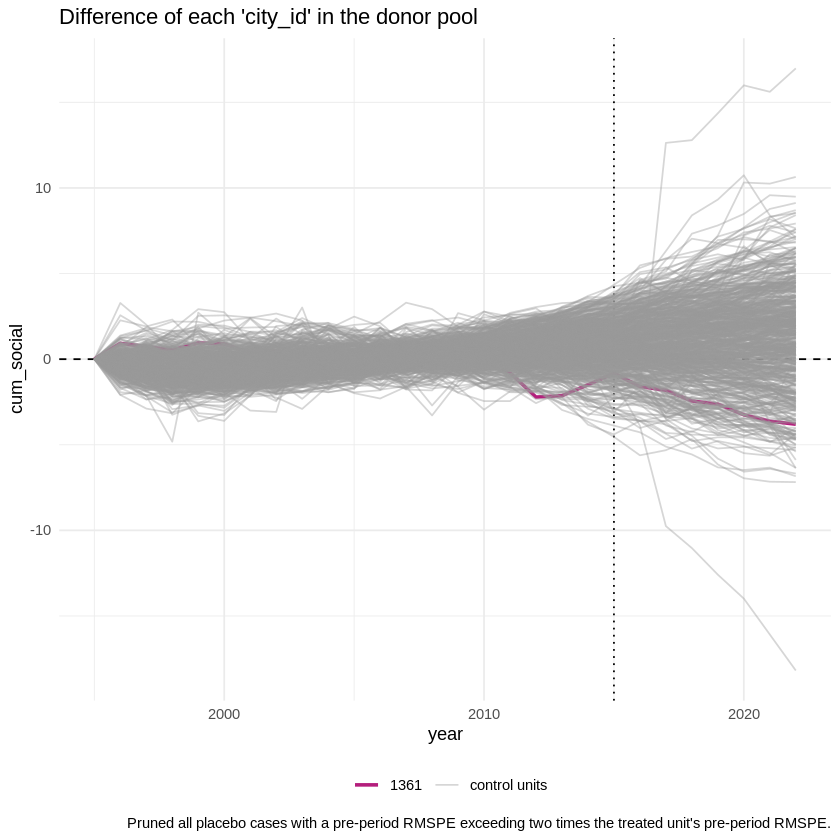

In [ ]:
tidysynth::plot_placebos(output_synth)